In [1]:
import pandas as pd
import utils as my

## Dataset

In [2]:
dataset_path = "./titanic-train.csv"
target_name = "Survived"
train_size = 0.75

dataset = pd.read_csv(dataset_path)
print(">> Data shape:", dataset.shape)
dataset.head(10)

>> Data shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Missing values and duplicates

In [4]:
print(">> Missing values:", dataset.isnull().any().sum())
print(">> Duplicate values:", dataset.duplicated().sum())

# dataset.drop_duplicates(inplace=True, keep='first', ignore_index=True)
# print(">> Duplicate values:", dataset.duplicated().sum())

>> Missing values: 3
>> Duplicate values: 0


### Unique values

In [5]:
n_data = dataset.shape[0]

print(">> n_unique = 1:       ", len(my.get_nunique_features(dataset, value=1)))
print(">> n_unique = n_data:  ", len(my.get_nunique_features(dataset, value=n_data)))
print(">> n_unique > n_data-5:", len(my.get_nunique_features(dataset, value=n_data-5, kind='greater_than')))
print(">> n_unique < 3        ", len(my.get_nunique_features(dataset, value=2, kind='less_than')))

>> n_unique = 1:        0
>> n_unique = n_data:   2
>> n_unique > n_data-5: 2
>> n_unique < 3         0


## Data types

### Ignore features

In [6]:
dataset = pd.read_csv(dataset_path)
print(">> Initial:\n", dataset.dtypes.value_counts())

ignore_features = []
ignore_features += my.get_nunique_features(dataset, value=1)
ignore_features += my.get_nunique_features(dataset, value=dataset.shape[0])
ignore_features = list(set(ignore_features))

if target_name in ignore_features:
    ignore_features.remove(target_name)

print(ignore_features)
dataset.drop(ignore_features, axis=1, inplace=True)
print(">> After dropping features:\n", dataset.dtypes.value_counts())

>> Initial:
 int64      5
object     5
float64    2
dtype: int64
['Name', 'PassengerId']
>> After dropping features:
 int64      4
object     4
float64    2
dtype: int64


### Numerical features

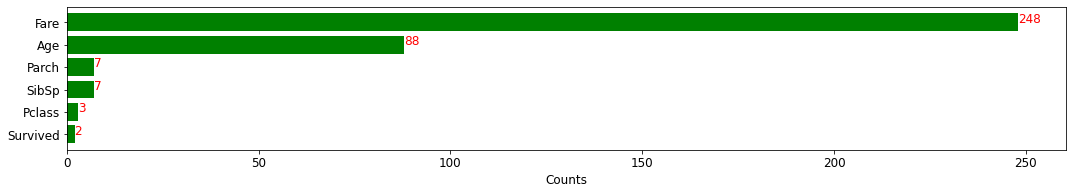

In [7]:
numerical_features = dataset.select_dtypes(include='number').columns.values
my.show_counts(dataset, numerical_features)

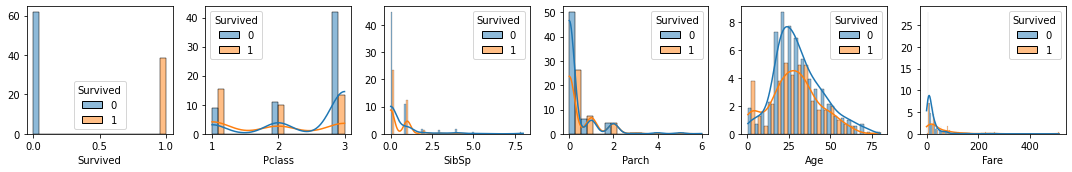

In [8]:
feature_names = my.get_nunique_features(dataset[numerical_features], value=1, kind="greater_than")
my.show_histogram(dataset, feature_names, target=target_name, kde=True)

### Categorical features

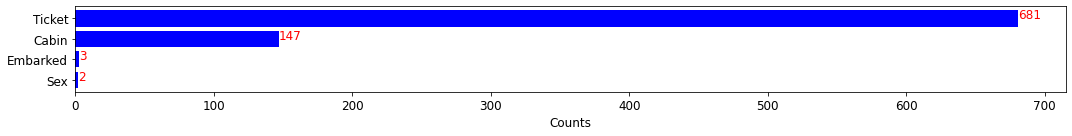

In [9]:
categorical_features = dataset.select_dtypes(include=['object', 'category']).columns.values
my.show_counts(dataset, categorical_features, color='blue')

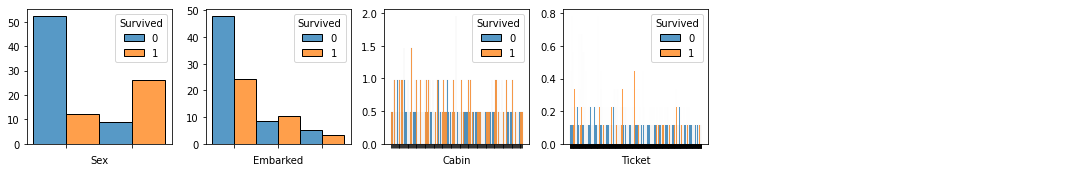

In [10]:
feature_names = my.get_nunique_features(dataset[categorical_features], value=1, kind="greater_than")
my.show_histogram(dataset, feature_names, target=target_name, xlabels=False)

### Ordinal features

In [11]:
ordinal_features = None
# my.show_histogram(dataset, ordinal_features, target=target_name)

### High cardinality features

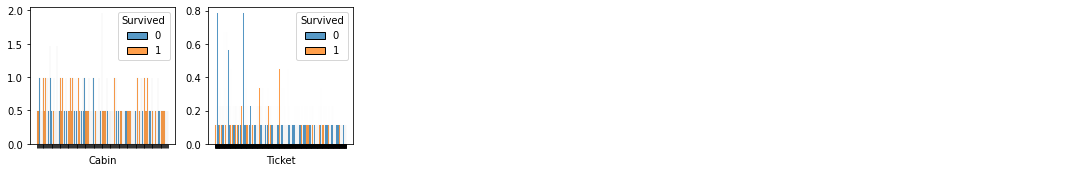

In [12]:
high_cardianlity_features = ['Cabin', 'Ticket']
my.show_histogram(dataset, high_cardianlity_features, target=target_name, xlabels=False)

### Group features

In [13]:
group_features = None
# show_histogram(dataset, group_features, target=target_name)

### Bin number features

In [14]:
group_features = None
# show_histogram(dataset, group_features, target=target_name)

## Correlations between features

### Numerical Features - Peason's R

In [15]:
dataset[numerical_features].isnull().any()

Survived    False
Pclass      False
Age          True
SibSp       False
Parch       False
Fare        False
dtype: bool

In [16]:
dataset["Age"].fillna(dataset["Age"].mean(), inplace=True)

numerical_features = dataset.select_dtypes(include='number').columns
high_corr_features, (names, values) = my.get_high_corr_numerical(
                                        dataset, numerical_features, threshold=0.3)
high_corr_features

Pearson's R = 0.4148 - ['SibSp' 'Parch']
Pearson's R = -0.3313 - ['Pclass' 'Age']
Pearson's R = -0.3385 - ['Survived' 'Pclass']
Pearson's R = -0.5495 - ['Pclass' 'Fare']


['Pclass', 'SibSp', 'Survived']

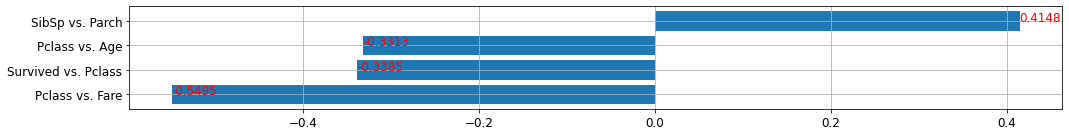

In [17]:
my.show_correlations(names, values, threshold=0.3)

### Categorical features - Cramer's V

In [18]:
dataset[categorical_features].isnull().any()

Sex         False
Ticket      False
Cabin        True
Embarked     True
dtype: bool

In [19]:
dataset[categorical_features] = dataset[categorical_features].fillna("Unknown")
dataset[categorical_features].isnull().any()

Sex         False
Ticket      False
Cabin       False
Embarked    False
dtype: bool

In [ ]:
categorical_features = dataset.select_dtypes(include=['object', 'category']).columns.values
dataset_encoded = pd.get_dummies(dataset[categorical_features])
categorical_features = dataset_encoded.columns.values

high_corr_features, (names, values) = my.get_high_corr_categorical(
                                            dataset_encoded, categorical_features, threshold=0.8)

In [ ]:
my.show_correlations(names, values, threshold=0.5)